In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


# Importing necessary libraries

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split,cross_val_score

# Importing the dataset and describing the dataset

In [28]:
df=pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv").drop(columns='id')
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Label Enocding and Scaling, Plotting Correlations

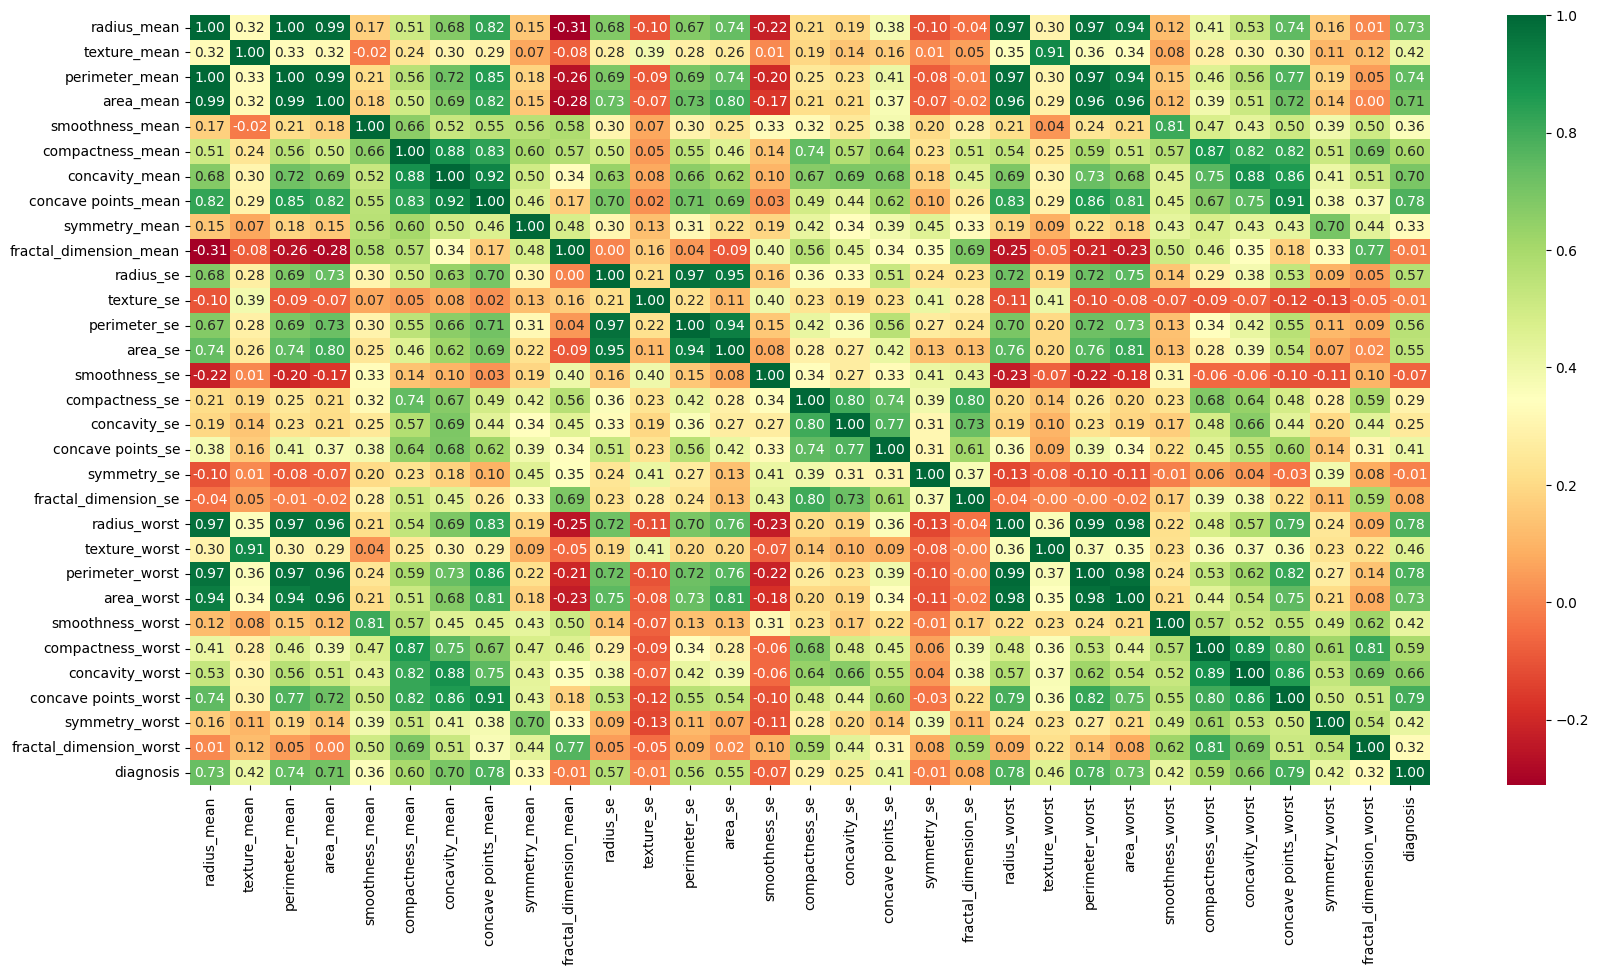

In [29]:
numeric_cols=list(df.select_dtypes(include='float64').columns)
mms=MinMaxScaler()
le=LabelEncoder()
new_df=pd.DataFrame(mms.fit_transform(df[numeric_cols]),columns=numeric_cols)
df['diagnosis']=le.fit_transform(df['diagnosis'])
new_df['diagnosis']=df['diagnosis']
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(),cmap='RdYlGn',annot=True,fmt='.2f')
plt.show()

# Linear SVM Model Training and Plotting Decision Boundary

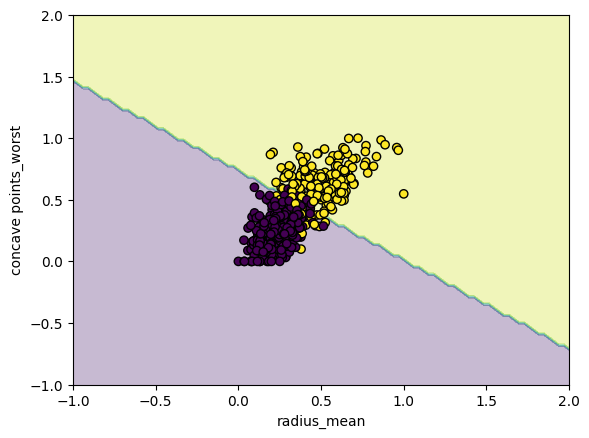

In [30]:
x=new_df[['radius_mean','concave points_worst']]
y=new_df['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
svc1=SVC(kernel="linear",C=1.0)
svc1.fit(x_train,y_train)
disp1=DecisionBoundaryDisplay.from_estimator(svc1,x,response_method='predict',alpha=0.3)
disp1.ax_.scatter(x['radius_mean'],x['concave points_worst'],c=y,edgecolors='k')
plt.show()

# Non-Linear SVM Model Training and Plotting Decision Boundary

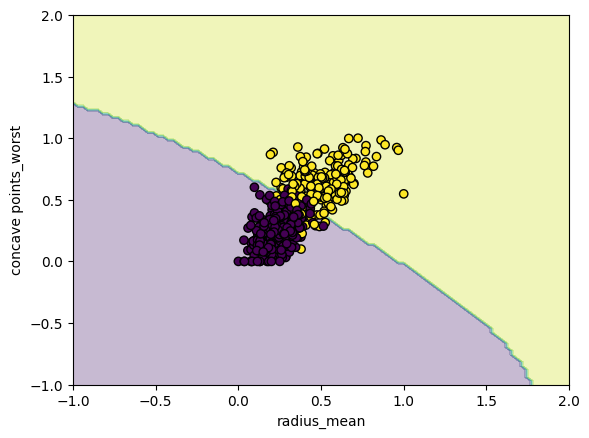

In [31]:
svc2=SVC(kernel="rbf",C=1.0,gamma=0.5)
svc2.fit(x_train,y_train)
disp2=DecisionBoundaryDisplay.from_estimator(svc2,x,response_method='predict',alpha=0.3)
disp2.ax_.scatter(x['radius_mean'],x['concave points_worst'],c=y,edgecolors='k')
plt.show()

# Evaluation of models using Cross-Validation

In [32]:
models={"Linear SVM":svc1,"Non-Linear SVM":svc2}
for name,model in models.items():
    print(name+" Metrics:")
    acc=cross_val_score(model,x_train,y_train,scoring='accuracy')
    auc_roc=cross_val_score(model,x_train,y_train,scoring='roc_auc')
    print("Accuracy:",acc.mean())
    print("AUC-ROC",auc_roc.mean())
    print("\n")

Linear SVM Metrics:
Accuracy: 0.9246202531645569
AUC-ROC 0.9772732817264836


Non-Linear SVM Metrics:
Accuracy: 0.922120253164557
AUC-ROC 0.9775399483931503


